Análisis de gasto común

In [13]:
#Importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [14]:
#Leer archivo
gc_df = pd.read_csv('../Archivos CSV/GASTO_COMUN.csv')

In [15]:
#Información del archivo
gc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   FOLIO                      10 non-null     object 
 1   MES DE COBRO               10 non-null     object 
 2   ANIO                       10 non-null     int64  
 3   DESDE                      10 non-null     object 
 4   HASTA                      10 non-null     object 
 5   GASTO COMUN EDIFICIO       10 non-null     object 
 6   GASTO COMUN                10 non-null     float64
 7   FONDO DE RESERVA           10 non-null     float64
 8   SEGURO UNIDAD COPROPIEDAD  9 non-null      float64
 9   AGUA INDIVIDUAL            10 non-null     float64
 10  COMBUSTIBLE                9 non-null      float64
 11  OTROS COBROS               1 non-null      float64
 12  70% BOL GAS                10 non-null     object 
 13  VALOR TOTAL M3             10 non-null     float64
 1

In [16]:
#Visualización df
gc_df.head()

,FOLIO,MES DE COBRO,ANIO,DESDE,HASTA,GASTO COMUN EDIFICIO,GASTO COMUN,FONDO DE RESERVA,SEGURO UNIDAD COPROPIEDAD,AGUA INDIVIDUAL,COMBUSTIBLE,OTROS COBROS,70% BOL GAS,VALOR TOTAL M3,TOTAL A PAGAR
0,13-3400,Junio,2023,31-05-2023,30-06-2023,18.527.884,57.603,2.880,2.558,6.659,24.203,NaN,4.394.514,6.172,93.903
1,14-3676,Julio,2023,30-06-2023,31-07-2023,16.185.498,50.321,2.516,2.558,5.382,20.220,NaN,4.633.712,6.401,80.997
2,15-3952,Agosto,2023,31-07-2023,31-08-2023,16.332.521,50.778,2.539,2.558,5.929,18.815,NaN,4.229.931,6.186,80.619
3,16-4228,Septiembre,2023,31-08-2023,30-09-2023,18.857.327,58.627,2.931,2.558,6.727,27.595,NaN,4.835.706,6.864,98.438
4,17-4504,Octubre,2023,30-09-2023,31-10-2023,16.427.727,51.074,2.554,NaN,7.095,23.807,NaN,4.104.248,6.180,84.530


In [17]:
# Convertir columnas a datetime
gc_df["DESDE"] = pd.to_datetime(gc_df["DESDE"])
gc_df["HASTA"] = pd.to_datetime(gc_df["HASTA"])

C:\Users\manee\AppData\Local\Temp\ipykernel_7188\3192547614.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  gc_df["DESDE"] = pd.to_datetime(gc_df["DESDE"])
C:\Users\manee\AppData\Local\Temp\ipykernel_7188\3192547614.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  gc_df["HASTA"] = pd.to_datetime(gc_df["HASTA"])


In [18]:
#Eliminar puntos y convertir a flotante la columna "GASTO COMUN EDIFICIO"
gc_df["GASTO COMUN EDIFICIO"] = gc_df["GASTO COMUN EDIFICIO"].str.replace(".", "").astype(float) / 1000000

#Eliminar puntos y convertir a flotante la columna "70% BOL GAS"
gc_df["70% BOL GAS"] = gc_df["70% BOL GAS"].str.replace(".", "").astype(float) / 1000000

In [19]:
gc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   FOLIO                      10 non-null     object        
 1   MES DE COBRO               10 non-null     object        
 2   ANIO                       10 non-null     int64         
 3   DESDE                      10 non-null     datetime64[ns]
 4   HASTA                      10 non-null     datetime64[ns]
 5   GASTO COMUN EDIFICIO       10 non-null     float64       
 6   GASTO COMUN                10 non-null     float64       
 7   FONDO DE RESERVA           10 non-null     float64       
 8   SEGURO UNIDAD COPROPIEDAD  9 non-null      float64       
 9   AGUA INDIVIDUAL            10 non-null     float64       
 10  COMBUSTIBLE                9 non-null      float64       
 11  OTROS COBROS               1 non-null      float64       
 12  70% BOL GAS

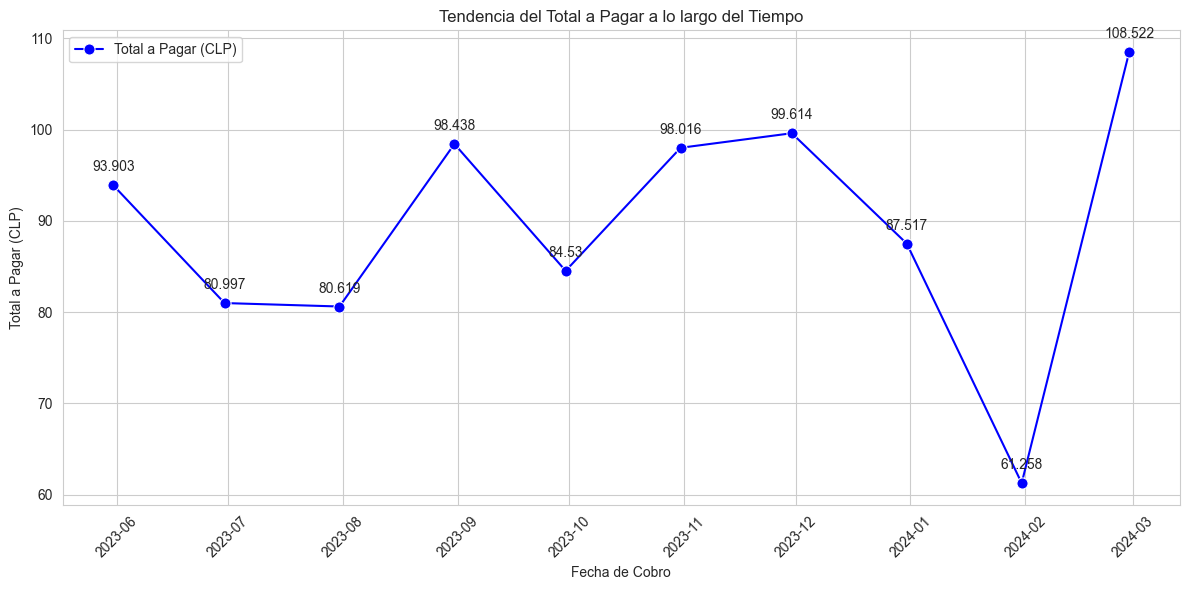

In [46]:
#Línea de tendencia
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=gc_df, x='DESDE', y='TOTAL A PAGAR', marker='o', markersize=8, color='b', label='Total a Pagar (CLP)')
plt.title('Tendencia del Total a Pagar a lo largo del Tiempo')
plt.xlabel('Fecha de Cobro')
plt.ylabel('Total a Pagar (CLP)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

for x, y, total in zip(gc_df['DESDE'], gc_df['TOTAL A PAGAR'], gc_df['TOTAL A PAGAR']):
    plt.annotate(f'{total}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)

plt.legend()
plt.show()

In [47]:
gc_brother_df = pd.read_csv('GASTO_COMUN_BROTHER,csv')

FileNotFoundError: [Errno 2] No such file or directory: 'GASTO_COMUN_BROTHER,csv'